In [1]:
import re
import random
import numpy as np
import pandas as pd

from tqdm import tqdm
from collections import Counter

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM, Conv1D, GlobalAveragePooling1D
from keras.callbacks import ModelCheckpoint

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

from matplotlib import pyplot as plt
from matplotlib import rcParams

import sys
import time

sys.path.append("../")
from calculus_path_mod.terms.pseudonym import *
from calculus_path_mod.reduction_strategy import *
from calculus_path_mod.terms.arithm_complex_ops import *

Count all terms: 4251

Count original terms: 4251



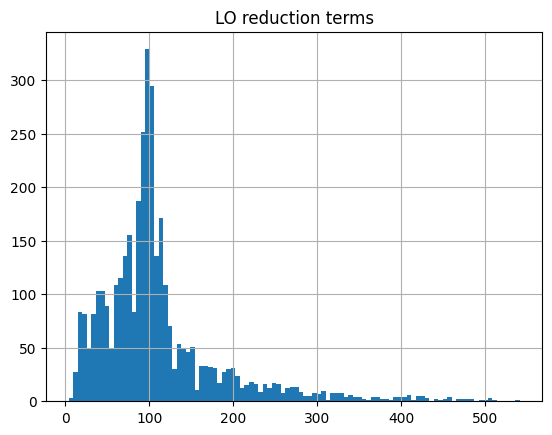

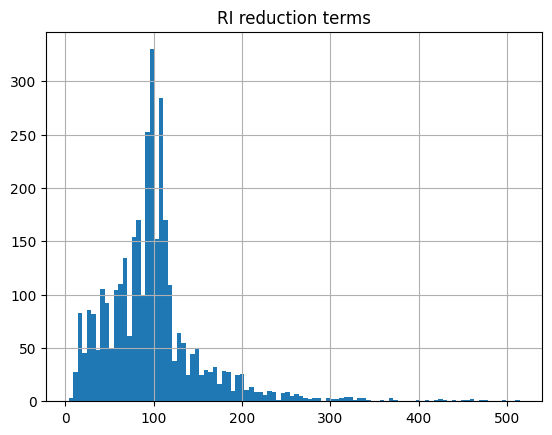

In [7]:
data = pd.read_csv("../data_steps/steps_simple_term_str.csv", delimiter=',')

# leave only unique terms
print(f"Count all terms: {len(data)}\n")
data = data.drop_duplicates(subset="simple_terms").reset_index(drop=True)
print(f"Count original terms: {len(data)}\n")

# shuffle the dataset
data = data.drop_duplicates(["simple_terms"])
data["terms_len"] = [len(sterm.replace("@x.", "y").replace(" ", "")) for sterm in data["simple_terms"]]

# filter out steps that are more than 30
data_lo = data[[steps < 31 for steps in data['LO_steps_num']]]
data_ri = data[[steps < 31 for steps in data['RI_steps_num']]]


lo_len = Counter(data_lo["terms_len"].tolist())
ri_len = Counter(data_ri["terms_len"].tolist())

data_to_vis = pd.DataFrame()
data_to_vis["LO reduction terms"] = data_lo[[tlen < 550 for tlen in data_lo["terms_len"]]]["terms_len"]
data_to_vis.hist(bins=100)
plt.show()

data_to_vis = pd.DataFrame()
data_to_vis["RI reduction terms"] = data_ri["terms_len"]
data_to_vis.hist(bins=100)
plt.show()

In [8]:
print(f"LO tokens no crop {sum(data_lo['terms_len'].tolist())}")
print(f"RI tokens no crop {sum(data_ri['terms_len'].tolist())}")

print(f"LO tokens {sum([lterm if lterm < 513 else 0 for lterm in data_lo['terms_len'].tolist()])}")
print(f"RI tokens {sum([lterm if lterm < 513 else 0 for lterm in data_ri['terms_len'].tolist()])}")

LO tokens no crop 439750
RI tokens no crop 340763
LO tokens 405791
RI tokens 340249


Count all terms: 44568

Count original terms: 44568



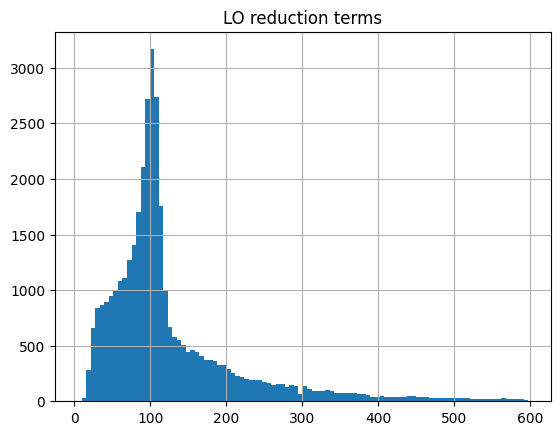

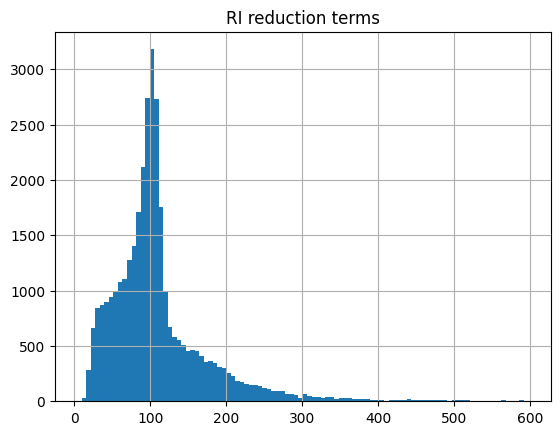

In [2]:
data = pd.read_csv("../data_steps/steps_simple_term_str_extended.csv", delimiter=',')

# leave only unique terms
print(f"Count all terms: {len(data)}\n")
data = data.drop_duplicates(subset="simple_terms").reset_index(drop=True)
print(f"Count original terms: {len(data)}\n")

# shuffle the dataset
data = data.drop_duplicates(["simple_terms"])
data["terms_len"] = [len(sterm.replace("@x.", "y").replace(" ", "")) for sterm in data["simple_terms"]]

# filter out steps that are more than 30
data_lo = data[[steps < 31 for steps in data['LO_steps_num']]]
data_ri = data[[steps < 31 for steps in data['RI_steps_num']]]


lo_len = Counter(data_lo["terms_len"].tolist())
ri_len = Counter(data_ri["terms_len"].tolist())

data_to_vis = pd.DataFrame()
data_to_vis["LO reduction terms"] = data_lo[[tlen < 600 for tlen in data_lo["terms_len"]]]["terms_len"]
# data_to_vis["LO reduction terms"] = data_lo["terms_len"]
data_to_vis.hist(bins=100)
plt.show()

data_to_vis = pd.DataFrame()
data_to_vis["RI reduction terms"] = data_ri[[tlen < 600 for tlen in data_ri["terms_len"]]]["terms_len"]
# data_to_vis["RI reduction terms"] = data_ri["terms_len"]
data_to_vis.hist(bins=100)
plt.show()

In [10]:
print(f"LO tokens no crop {sum(data_lo['terms_len'].tolist())}")
print(f"RI tokens no crop {sum(data_ri['terms_len'].tolist())}")

print(f"LO tokens {sum([lterm if lterm < 513 else 0 for lterm in data_lo['terms_len'].tolist()])}")
print(f"RI tokens {sum([lterm if lterm < 513 else 0 for lterm in data_ri['terms_len'].tolist()])}")

LO tokens no crop 6457018
RI tokens no crop 4422660
LO tokens 4478463
RI tokens 3773537


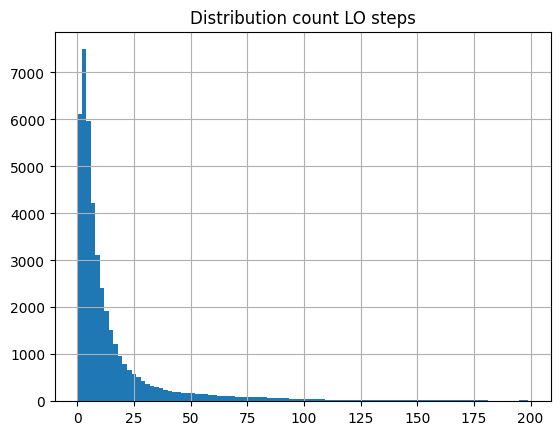

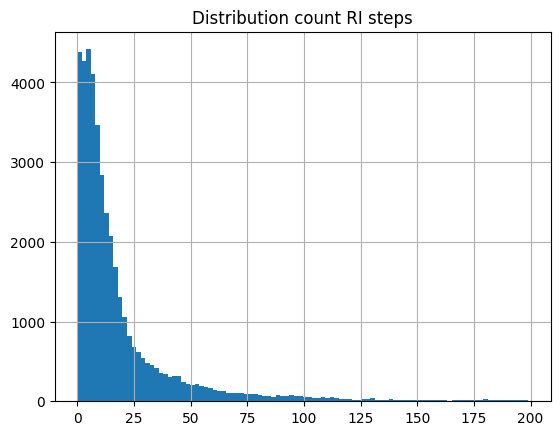

In [10]:
data_to_vis = pd.DataFrame()
data_to_vis["Distribution count LO steps"] = data[[csteps < 200 for csteps in data["LO_steps_num"]]]["LO_steps_num"]
# data_to_vis["Distribution count LO steps"] = data["LO_steps_num"]
data_to_vis.hist(bins=100)
plt.show()

data_to_vis = pd.DataFrame()
data_to_vis["Distribution count RI steps"] = data[[csteps < 200 for csteps in data["RI_steps_num"]]]["RI_steps_num"]
# data_to_vis["Distribution count RI steps"] = data["RI_steps_num"]
data_to_vis.hist(bins=100)
plt.show()